In [1]:
import pandas as pd

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [12]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [6]:
df=pd.read_csv('twitter_validation.csv')
df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [23]:
df=df.rename(columns={df.columns[0]: 'Id',df.columns[1]: 'Source',  df.columns[2]: 'Nature',df.columns[3]: 'Text'})
df=df.head(500)
df

,Id,Source,Nature,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
495,6787,Fortnite,Irrelevant,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...
496,3838,Cyberpunk2077,Positive,Dang there goes my birthday present but maybe ...
497,2008,CallOfDuty,Irrelevant,It was ab fab seeing the 6 bungalows built in ...
498,4096,CS-GO,Neutral,1.7 million viewers? wtf? and cs:go has more t...


In [24]:
fsen=[]
fval=[]
femo=[]
for i in df['Text']:
    
    #print(cleaned_text)
    lower_case = i.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    
    #remove stop words
    tokenized_words = word_tokenize(cleaned_text, "english")
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)
            
            
    #remove lemma words
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
    
    #len grater than 2
    h=[]
    for ir in lemma_words:
        if len(ir)>2:
            h.append(ir)
    
    #remove http and RT
    h1 = [word for word in h
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    
    #remove ...
    h2=[]
    for i in h1:
        if '...' not in i:
            h2.append(i)
    
    #concat agian as a single string
    f1=''
    for i in h2:
        f1=f1+' '+i
    print(f1)
    
    
            
    
    score = SentimentIntensityAnalyzer().polarity_scores(f1)
    
    
    
    if score['neg'] > score['pos']:
        val='Negative'
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        val='positive'
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")
        val='Neutral'
        
    fsen.append(f1)
    fval.append(val)
    
    
    
    emotion_labels = emotion(f1)
    emo=emotion_labels[0]['label']
    print(emo)
    femo.append(emo)
    
    
        

 bbc news amazon bos jeff bezos reject claim company acted like drug dealer bbccouknewsavbusine…
Positive Sentiment
neutral
 microsoft pay word function poorly samsungus chromebook
Negative Sentiment
disapproval
 csgo matchmaking full closet hacking truly awful game
Negative Sentiment
disgust
 president slapping american face really commit unlawful act acquittal discover google vanityfaircomnews202002t…
Positive Sentiment
neutral
 eahelp madeleine mccann cellar past year little sneaky thing escaped whilst loading fifa point took card use paypal account working help resolve please
Positive Sentiment
caring
 thank eamaddennfl new austin hooper orange brown brown austinhooper18 pictwittercomgrg4xzfkon
Positive Sentiment
gratitude
 rocket league sea thief rainbow six siege🤔 love playing three stream best stream twitch rocketleague seaofthieves rainbowsixsiege follow
Positive Sentiment
neutral
 still kneedeep assassin creed odyssey way anytime soon lmao
Positive Sentiment
amusement
 fix jes

neutral
 sound enjoy groove little montage made tribute desert eagle powerful badass secondary weapon ever callofduty modernwarfare xbox joececot artpeasant drift0r
Positive Sentiment
joy
 seems like playstation marketing deal callofdutyblackopscoldwar feel good treated well playstation
Positive Sentiment
neutral
 eamaddennfl trying golden ticket challenge working friend post pointing
Positive Sentiment
neutral
 much enjoy ghostreconbreakpoint division2 love lore title gaming gamebooks instagramcompb9feinlnn1u…
Positive Sentiment
joy
 1982 johnson johnson extra strength tylenol recalled seven people died taking haitian music
Negative Sentiment
neutral
 god
Positive Sentiment
neutral
 satyanadella microsoft thanks celebrating diversity need positive energy day
Positive Sentiment
gratitude
 best one wtf
Positive Sentiment
admiration
 aoc make ignorant comment come meet
Negative Sentiment
neutral
 oooooh shit think motherboard already compatible
Negative Sentiment
surprise
 nyummm delicio

optimism
 nothing like getting two leaver game would promoted love league legends👍👍👍👍👍🤡
Positive Sentiment
love
 nigeria national team ranked 29th best team world 3rd africa latest fifa world ranking 🇳🇬🦅 first time team made top since may 2013 kano nigeria instagramcompcfpzvton8ab…
Positive Sentiment
neutral
 good share check item loving poshmarkapp shopangrykitty poshmark fashion style shopmycloset pier1 leagueoflegends poshmk7zpktuisf9
Positive Sentiment
admiration
 finnish csgo player jamppi sue valve alleged vac ban talkesportbitly3bycjrt
Negative Sentiment
neutral
 catch xbox game podcast right intromediagamingcomhomethexbox… one best xbox podcast xbox xboxseriesx xboxseriess
Positive Sentiment
neutral
 git gud 5head sniping community probably
Neutral Sentiment
neutral
 see get behind explain self controller broken make complete sense thank ninja actually explaining fucking retard like everybody else
Negative Sentiment
gratitude
 oga dota pit season europecis look like going one h

approval
 precovid student game day introducing student robot entertainment game form leauge legendsdota2 ell program really loved check ready set hero lnkdingxjtnm esports youth changeforgood c…lnkdingxajecc
Positive Sentiment
love
 played pubg first time long time loved posting clip tonight
Positive Sentiment
love
 ghost tsushima better assassin creed game modern assassin creed
Positive Sentiment
neutral
 youtube pubg best kill squad kill solo kill skreams gaming best kill record dadaabhihai youtubecomwatchv7jc7dz…
Negative Sentiment
admiration
 bravo riotgames always know get hyped leagueoflegends ranked season super excited💯
Positive Sentiment
excitement
 dope puff great kid
Positive Sentiment
admiration
 team jerseyboys also represented twitch welcome chuckycsgo chef confidence offer content various game like world warcraft csgo valorant twitch click twitch channel tinyurlcomy5gm9h74 jerseyboys twitch
Positive Sentiment
neutral
 yasss excited tonight folk 730 bst come hang twitcht

neutral
 lmaothis country fvcked jfc saw johnson johnson commercialyou know folk toxic talc causing cancertalking theyre working round clock covid19 vaccine line folk roll sleeve
Neutral Sentiment
neutral
 woops made bunch boomer men mad facebook lmfaoooo pictwittercom3yijbzv2fs
Negative Sentiment
neutral
 shitting non preorder kid twitchtvgreasysunnyvale blackopscoldwar coldwarbeta
Negative Sentiment
anger
 may gon awesome
Positive Sentiment
excitement
 transvaginal mesh johnson johnson fined 344m deceptive marketing woman theguardiancombusiness2020…
Neutral Sentiment
neutral
 pic cute
Positive Sentiment
admiration
 facebook hub fake information
Negative Sentiment
neutral
 skunkworks johnson johnson rushing develop coronavirus vaccine inquirercombusinessdrugs… via phillyinquirer
Neutral Sentiment
neutral
 gon say overwatch essentially nominated lgbtq game year worse rise skywalker nominated lgbtq film year least rise skywalker slow footage zoom see gay shit squint
Negative Sentiment
n

neutral
 whoisaddison made fortnite montage
Neutral Sentiment
neutral
 yogg saron puzzle box quite possibly favorite card game secret puzzle box make truly crazy insane wtf moment fun even shitshow hearthstone
Positive Sentiment
amusement
 esports curiosity probably know red dead redemption goalsncom202002esport…
Negative Sentiment
curiosity
 nvidia geforce google stadium rival suffers another blow news89netnvidiageforce…
Negative Sentiment
neutral
 saw tweet story told cuz theyre mad men died war didnt battlefield treatment cant even think another ww1 movie ppl would even know
Negative Sentiment
surprise
 bro abusive internet boyfriend used call stupid bitch whenever nigga used like pic facebook used beg mad stupid bitch real
Negative Sentiment
anger
 game never
Neutral Sentiment
neutral
 verizonfios frustration hold 30min finally talk rep say call back due static hear 4hours still heard terrible customer service experience verizon
Negative Sentiment
anger
 experience assassin creed o

neutral
 check video leagueoflegends captured outplayed 2020alienwaregames pictwittercomx6kqew08hw
Neutral Sentiment
neutral
 like almost time ubisoft problem receive reward later ubisoft
Positive Sentiment
neutral
 hated packing one least sold arrived safelylol resellercommunity flipping thriftshopping thrift goodwill yardsalefinds yardsale garagesale americanpickers ebay amazon sourcing… instagramcompcbbfx5rfqhw…
Negative Sentiment
amusement
 release woltk expansion best one far blizzmilkfat blizzardent warcraft mikemorhaime day7 pictwittercomfgplmastt8
Positive Sentiment
neutral
 game mutuals pokémon borderland much sims havent played forever tho spiderman ps4 spyro reignited uuuh good either ciaranstrange sasspiria orionsuccs msmarquise8 bleh
Positive Sentiment
neutral
 really really hope microsoft taking away previously multiplatform stuff fucking suck always fucking sucked
Negative Sentiment
anger
 dreamed playing league legend korone playing support shaco controllerit vivid
Posi

neutral
 extraordinary podcast deanna berg fight bilateral ovarian cancer determination hold johnson johnson account negligence selling talcbased baby powder witnesspodcastscomshowsverified…
Negative Sentiment
neutral
 absolutely love thank much beautiful version lani thel
Positive Sentiment
admiration
 want thank sskywildkatsss letting run new borderland dlc last night lot fun
Positive Sentiment
gratitude
 dont know fortnitegame doesnt seem care asia server mostthey care every single server region yet asiappl south east asia bad pingfighting japanese ping epic fuck new freefortnite
Negative Sentiment
neutral
 fuck missed
Negative Sentiment
neutral
 shared via microsoft edge new york city school ban zoom due security concern shift microsoft team geekwire geekwirecom2020newyork…
Positive Sentiment
neutral
 nice bow creepypastaassassins creed love girl peices cant believe havent posted drawing twitter time fix fyi chacrter one reason blademaster122 creed thecreedfighter assassinscreed cr

In [25]:
sia = pd.DataFrame(list(zip(fsen,fval)),
               columns =['Sentence', 'Sentiment'])
sia

,Sentence,Sentiment,Emotion
0,bbc news amazon bos jeff bezos reject claim c...,positive,neutral
1,microsoft pay word function poorly samsungus ...,Negative,disapproval
2,csgo matchmaking full closet hacking truly aw...,Negative,disgust
3,president slapping american face really commi...,positive,neutral
4,eahelp madeleine mccann cellar past year litt...,positive,caring
...,...,...,...
495,dumb lucky☘️ fortnite montage youtubepswjtnkb...,Negative,joy
496,dang birthday present maybe better,positive,excitement
497,fab seeing bungalow built walsden localitynew...,positive,neutral
498,million viewer wtf csgo minecraft fortnite se...,Negative,neutral


In [16]:
from transformers import pipeline


2022-12-31 12:42:29.422349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')


2022-12-31 12:43:13.610852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [20]:
emotion_labels = emotion("I'm happy hired")
emotion_labels[0]['label']

'joy'

In [27]:
sent=[]
emot=[]
for i in df["Text"]:
    emotion_labels = emotion(i)
    emo=emotion_labels[0]['label']
    sent.append(i)
    emot.append(emo)
    
emotion = pd.DataFrame(list(zip(sent,fval)),
               columns =['Sentence', 'Emotion'])
emotion
    

,Sentence,Emotion
0,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
1,@Microsoft Why do I pay for WORD when it funct...,curiosity
2,"CSGO matchmaking is so full of closet hacking,...",annoyance
3,Now the President is slapping Americans in the...,neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,curiosity
...,...,...
495,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...,neutral
496,Dang there goes my birthday present but maybe ...,excitement
497,It was ab fab seeing the 6 bungalows built in ...,neutral
498,1.7 million viewers? wtf? and cs:go has more t...,curiosity


In [72]:
emotion=emotion.drop(0)
emotion

,Sentence,Emotion
1,@Microsoft Why do I pay for WORD when it funct...,curiosity
2,"CSGO matchmaking is so full of closet hacking,...",annoyance
3,Now the President is slapping Americans in the...,neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,curiosity
5,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,gratitude
...,...,...
495,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...,neutral
496,Dang there goes my birthday present but maybe ...,excitement
497,It was ab fab seeing the 6 bungalows built in ...,neutral
498,1.7 million viewers? wtf? and cs:go has more t...,curiosity


In [28]:
df['Text'][0]

"BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"

In [29]:
df['Text'][1]

'@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'

In [30]:
df['Text'][2]

"CSGO matchmaking is so full of closet hacking, it's a truly awful game."

In [31]:
df['Text'][3]

'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…'

In [60]:
j=emotion['Emotion'].value_counts(sort=False)

In [61]:
j

neutral           143
curiosity          24
annoyance          27
gratitude          14
confusion           6
amusement          18
admiration         57
excitement         37
joy                24
anger              21
approval           22
caring              3
surprise            8
disappointment     13
love               28
fear                7
realization        14
disgust             6
disapproval        15
desire              1
optimism            5
embarrassment       2
sadness             3
remorse             2
Name: Emotion, dtype: int64

In [62]:
print(type(j))

<class 'pandas.core.series.Series'>


In [64]:
j=pd.DataFrame(j)
j=j.drop('neutral')
j

,Emotion
curiosity,24
annoyance,27
gratitude,14
confusion,6
amusement,18
admiration,57
excitement,37
joy,24
anger,21
approval,22


In [65]:
j=j.reset_index()
j

,index,Emotion
0,curiosity,24
1,annoyance,27
2,gratitude,14
3,confusion,6
4,amusement,18
5,admiration,57
6,excitement,37
7,joy,24
8,anger,21
9,approval,22


[Text(0.5, 0, 'Tweet count'), Text(0, 0.5, 'Emotions')]

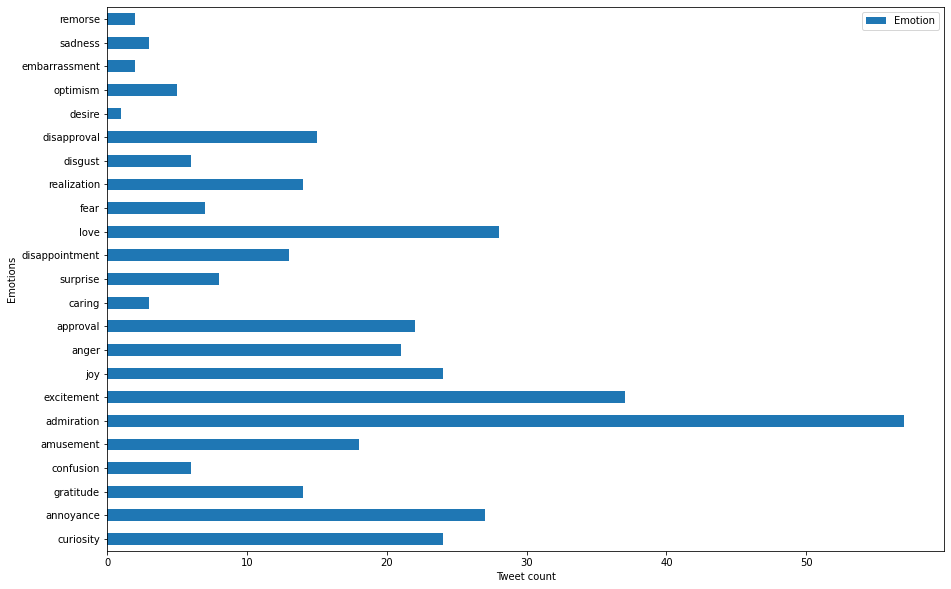

In [75]:

ax = j.plot.barh(x='index', y='Emotion', rot=0,figsize=(15, 10))
ax. set(xlabel="Tweet count", ylabel="Emotions")

In [67]:
import seaborn as sns


Text(0.5, 1.0, 'Emotion Distribution')

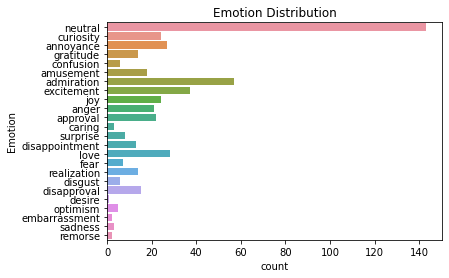

In [71]:
sns.countplot(data = emotion, y = 'Emotion').set_title("Emotion Distribution")


In [76]:
sia

,Sentence,Sentiment,Emotion
0,bbc news amazon bos jeff bezos reject claim c...,positive,neutral
1,microsoft pay word function poorly samsungus ...,Negative,disapproval
2,csgo matchmaking full closet hacking truly aw...,Negative,disgust
3,president slapping american face really commi...,positive,neutral
4,eahelp madeleine mccann cellar past year litt...,positive,caring
...,...,...,...
495,dumb lucky☘️ fortnite montage youtubepswjtnkb...,Negative,joy
496,dang birthday present maybe better,positive,excitement
497,fab seeing bungalow built walsden localitynew...,positive,neutral
498,million viewer wtf csgo minecraft fortnite se...,Negative,neutral


Text(0.5, 1.0, 'Emotion Distribution')

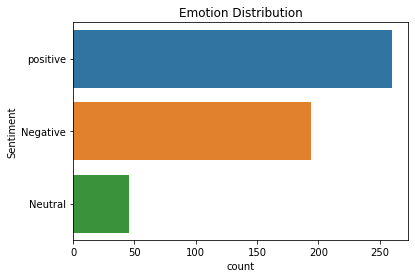

In [78]:
sns.countplot(data = sia, y = 'Sentiment').set_title("Emotion Distribution")


In [80]:
siapos=sia.loc[sia.Sentiment=='positive']
siapos=siapos['Sentence']
siapos

0       bbc news amazon bos jeff bezos reject claim c...
3       president slapping american face really commi...
4       eahelp madeleine mccann cellar past year litt...
5       thank eamaddennfl new austin hooper orange br...
6       rocket league sea thief rainbow six siege🤔 lo...
                             ...                        
491     hehe love thumbnail upcoming microsoft bethes...
492     fifa soar top chart week million player alrea...
494               special shoutouts microsoft excel 2013
496                   dang birthday present maybe better
497     fab seeing bungalow built walsden localitynew...
Name: Sentence, Length: 260, dtype: object

Positive words


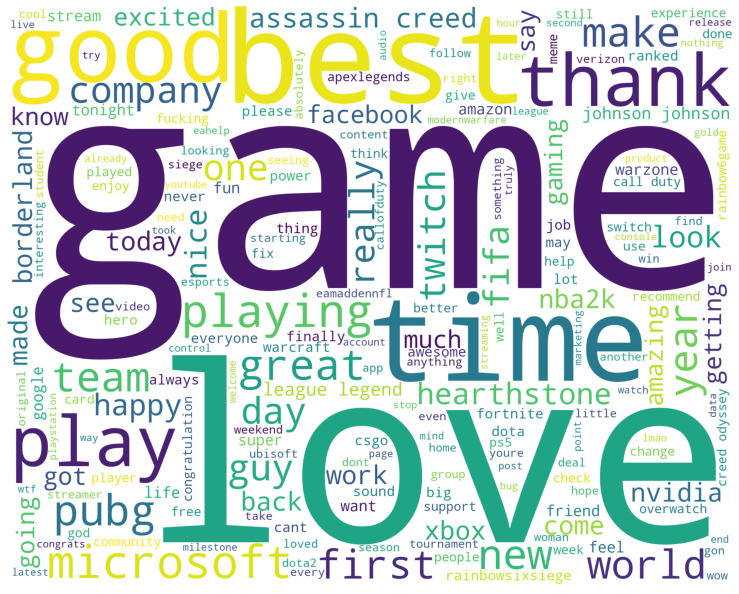

In [81]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(siapos,'white')


In [82]:
sianeg=sia.loc[sia.Sentiment=='Negative']
sianeg=sianeg['Sentence']
sianeg

1       microsoft pay word function poorly samsungus ...
2       csgo matchmaking full closet hacking truly aw...
8       fix jesus please fix world going playstation ...
11      fredtjoseph hey fred comcast cut cable verizo...
13      nba2k game suck second left team intentionall...
                             ...                        
489       ight nba2k false alarm pictwittercomf4gbu2bvkb
490     johnson johnson covid19 vaccine study paused ...
493     ban battlefield player sasobyte occurred see ...
495     dumb lucky☘️ fortnite montage youtubepswjtnkb...
498     million viewer wtf csgo minecraft fortnite se...
Name: Sentence, Length: 194, dtype: object

Negative words


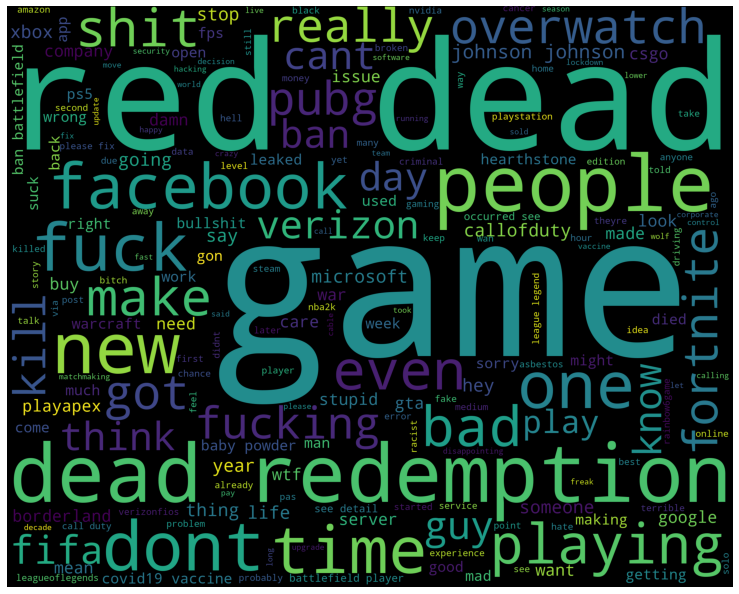

In [90]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Negative words")
wordcloud_draw(sianeg)


In [87]:
sianeu=sia.loc[sia.Sentiment=='Neutral']
sianeu=sianeu['Sentence']
sianeu

10      itching assassinate tccgif assassinscreedblac...
32                   thing would nvidia 3090 unspeakable
42      amazon stop accepting new online grocery cust...
47                            addicted call duty mobile😅
81                                   fuckkkkkk cant wait
84      used voice changer pretended girl csgo match ...
92                                                wilson
101     let fucking goooooooooooooooooooooooooooooooo...
129                   constant mouse clicking always got
138             git gud 5head sniping community probably
155     earned daily quest completed achievement warc...
164                          guy fucking cracked holeeee
177                              thought dis nigga meant
185                        ps5 got fortnite alr rip xbox
194     brand new driver date game still crashing goi...
234     androiddev ive noticed issue upgrading androi...
237     skin revenant look dope greasygamercomthreads...
240                            

Neutral words


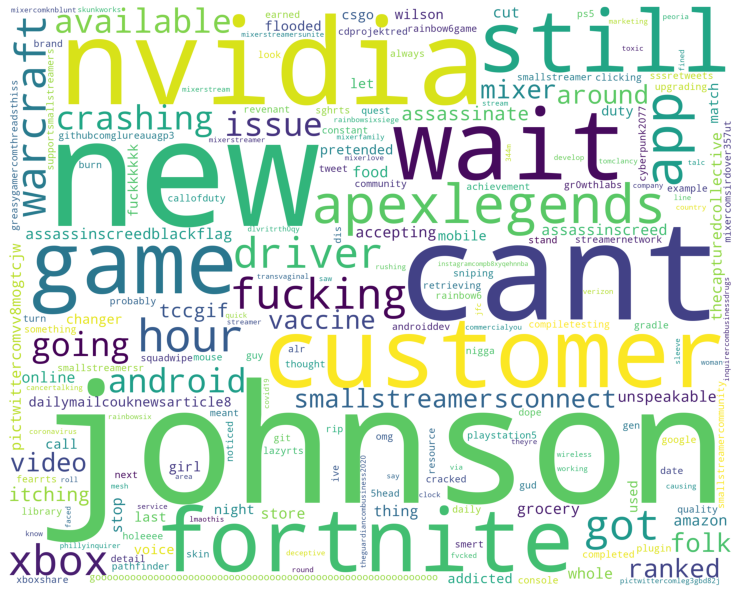

In [89]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Neutral words")
wordcloud_draw(sianeu,'white')

In [92]:
emotion

,Sentence,Emotion
1,@Microsoft Why do I pay for WORD when it funct...,curiosity
2,"CSGO matchmaking is so full of closet hacking,...",annoyance
3,Now the President is slapping Americans in the...,neutral
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,curiosity
5,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,gratitude
...,...,...
495,Dumb Lucky☘️ (Fortnite Montage) youtu.be/psW...,neutral
496,Dang there goes my birthday present but maybe ...,excitement
497,It was ab fab seeing the 6 bungalows built in ...,neutral
498,1.7 million viewers? wtf? and cs:go has more t...,curiosity


In [93]:
sad=emotion.loc[emotion.Emotion=='curiosity']
sad=sad['Sentence']
sad

1      @Microsoft Why do I pay for WORD when it funct...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
28     @Borderlands how do I submit a complaint? Your...
50     @PUBG_Support Hiya! So when'll u be fixing you...
57     Is there anything not wrong with this game why...
71                                            God when 🥺
95     @verizon Can you waive some data overage charg...
180    Normally i dont put time and effort into peopl...
187    First Community ban with 13/11 K/D after killi...
266    why can i hear my little sister arguing with p...
280    @EAHelp Hi was booted from battlefield V game ...
282    @Warcraft Can you explain this bullshit? Thank...
310    What does everyone think of @PlayOverwatch ope...
313    Whos ready for some zombie royale warzone stre...
321    @EAHelp I haven't been able to log on to Battl...
343    My experience with ASSASSIN'S CREED: ODYSSEY\n...
359    My League of Legends started having FPS spikes...
362    Why do parents freak out

sad words


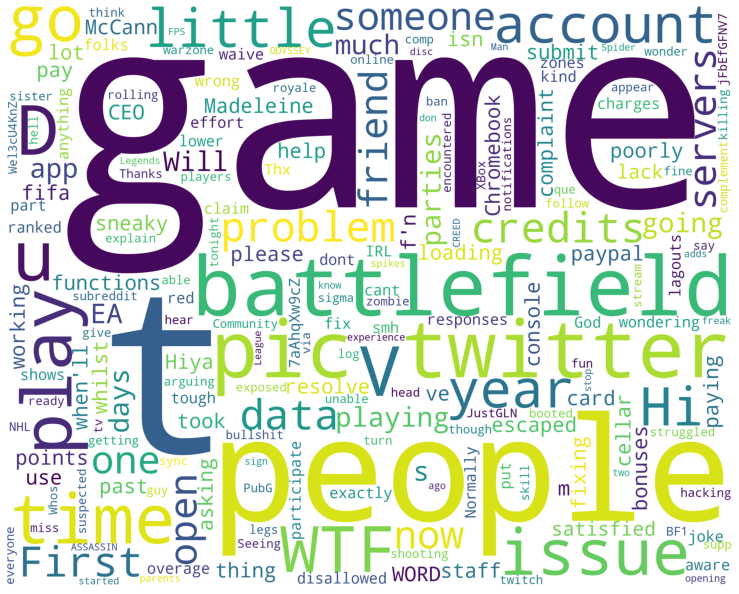

In [94]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("sad words")
wordcloud_draw(sad,'white')

In [158]:
from tkinter import *   
from tkinter import messagebox
from PIL import Image
top = Tk()  
  
top.geometry("500x500")  
  
def pos():  
    
    im = Image.open('pos.png')
    im.show()
    
def neg():  
    
    im = Image.open('neg.png')
    im.show()
    
def neu():  
    
    im = Image.open('neu.png')
    im.show()
    
    
def over():  
    
    im = Image.open('bar.png')
    im.show()
    
    
def emotion():  
    
    im = Image.open('emotion bar.png')
    im.show()





  

b1 = Button(top,text = "Positive",command = pos,activeforeground = "red",activebackground = "pink",pady=10)  
  
b2 = Button(top, text = "Neutral",command = neg,activeforeground = "blue",activebackground = "pink",pady=10)  
  
b3 = Button(top, text = "Negative",command = neu,activeforeground = "green",activebackground = "pink",pady = 10)  
  
    
b4 = Button(top,text = "Overall Analysis",command = over,activeforeground = "red",activebackground = "pink",pady=10)  
  
b5 = Button(top, text = "Emotion Analysis",command = emotion,activeforeground = "blue",activebackground = "pink",pady=10)  

#b6 = Button(top, text = "Negative",command = neu,activeforeground = "green",activebackground = "pink",pady = 10)      
#b4 = Button(top, text = "Yellow",activeforeground = "yellow",activebackground = "pink",pady = 10)  




b1.pack(side = LEFT)  
  
b2.pack(side = LEFT)  
  
b3.pack(side = LEFT)  

b4.pack(side=LEFT)

b5.pack(side=LEFT)


  
#b4.pack(side = LEFT)  
  
b1.place(x=600, y=100)
b2.place(x=690, y=100)
b3.place(x=780, y=100)
b4.place(x=700, y=200)
b5.place(x=700, y=250)

emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')


def replace():
    text = entry.get("1.0",END)
    emotion_labels = emotion(text)
    emo=emotion_labels[0]['label']
    output.insert(END, str(emo))

#Text Variables
enter = StringVar()

#Creating the widgets
l1 = Label(top, text="Enter text:")
entry = Text(top, width=50, height=3, wrap=WORD)
button = Button(top, text="Convert", width=20)
l2 = Label(top, text="Emotion:")
output = Text(top, width=50, height=3, wrap=WORD)

#Positioning the widgets
l1.grid(row=1, column=1, padx=5, sticky=W)
entry.grid(row=2, column=1, columnspan=2, padx=5, pady=(0,10))
button.grid(row=3, column=1, columnspan=2, pady=5)
l2.grid(row=4, column=1, padx=5, sticky=W)
output.grid(row=5, column=1, columnspan=2, padx=5, pady=(0,10))

#Button activation
button.configure(command=replace)





top.mainloop()  


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 